In [32]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
data=sio.loadmat("./features_2015.mat")

In [34]:
pdata=data['pdata']

In [35]:
material=pdata[:,3]

In [36]:
pdata_AC=pdata[material==2]

In [37]:
pdata_AC=pdata_AC[:,(0,1,6)]

In [38]:
pdata_AC.shape

(178007, 3)

In [39]:
#pdata_AC=pdata_AC.astype(np.int32)

In [40]:
AC=pd.DataFrame(pdata_AC, columns=['sgan','laid_year','length'])

In [41]:
AC.head()

,sgan,laid_year,length
0,2905098.0,1974.0,183.779848
1,9260735.0,1952.0,115.644669
2,9260774.0,1963.0,11.702646
3,2470112.0,1953.0,183.648820
4,2467340.0,1947.0,185.633048


In [42]:
AC.shape

(178007, 3)

In [43]:
faildata=sio.loadmat("./pfail1512.mat")

In [44]:
fail=pd.DataFrame(faildata['pfail1512'][:,(0,3)],columns=['sgan','fail_year'])

In [45]:
fail.head()

,sgan,fail_year
0,2614254,2000
1,2482317,2000
2,2617953,2000
3,2464350,2000
4,2520542,2000


In [46]:
AC_age=pd.DataFrame(np.array(2000-AC['laid_year']),columns=['observe_age'])

In [47]:
AC_age['age']=np.array(2016-AC['laid_year'])

In [48]:
AC_age=pd.concat([AC,AC_age],axis=1)

In [49]:
AC_age.sort_values(by=['age']).head()

,sgan,laid_year,length,observe_age,age
126463,10726905.0,2014.0,1.499751,-14.0,2.0
126496,10723871.0,2014.0,1.499802,-14.0,2.0
71575,10696867.0,2014.0,3.999927,-14.0,2.0
71576,10696866.0,2014.0,3.998707,-14.0,2.0
137667,10684080.0,2014.0,4.016837,-14.0,2.0


In [50]:
AC_age.shape

(178007, 5)

In [51]:
AC_full=pd.merge(fail, AC, how='inner', on=['sgan'])

In [52]:
AC_full.head()

,sgan,fail_year,laid_year,length
0,2614254,2000,1938.0,62.887588
1,2614254,2000,1938.0,62.887588
2,2614254,2013,1938.0,62.887588
3,2482317,2000,1969.0,197.155122
4,2482317,2014,1969.0,197.155122


In [53]:
AC_full['fail_age']=AC_full['fail_year']-AC_full['laid_year']

In [54]:
fail_age_negtive=AC_full.ix[AC_full['fail_age']<0,:]

In [55]:
AC_full.ix[AC_full['fail_age']<0,'fail_age']=0

In [56]:
AC_full.sort_values(by=['fail_age','laid_year']).head()

,sgan,fail_year,laid_year,length,fail_age
51634,9253285,2007,2006.0,49.754216,1.0
153,2712657,2000,1978.0,173.721659,22.0
154,2712657,2000,1978.0,173.721659,22.0
302,2453119,2000,1978.0,258.510630,22.0
362,2770590,2000,1978.0,40.838082,22.0


In [57]:
AC_full.shape

(76149, 5)

[[22.0, 24, 174.73271625800152, 0.13735264073021569],
 [23.0, 77, 425.21419865085477, 0.31843784495037164],
 [24.0, 108, 692.65361337040883, 0.47435993633235229],
 [25.0, 183, 971.5363923562337, 0.66272138263512681],
 [26.0, 264, 1186.5590518549775, 0.88521346980709026],
 [27.0, 341, 1512.234080591104, 1.1107076604066761],
 [28.0, 380, 1856.7668216680183, 1.3153644840667567],
 [29.0, 502, 2166.3219433359077, 1.5470936605837857],
 [30.0, 648, 2556.9571823435317, 1.8005198831559164],
 [31.0, 783, 2922.4132006601312, 2.0684491410114214],
 [32.0, 931, 3359.4897245989218, 2.3455745607390108],
 [33.0, 1004, 3739.3982567344224, 2.6140669573945043],
 [34.0, 1168, 4083.5474564070732, 2.9000927750123235],
 [35.0, 1338, 4457.8441638940512, 3.200237856537834],
 [36.0, 1566, 4852.7528792809071, 3.5229412867261138],
 [37.0, 1652, 5161.8670638779167, 3.842980524381125],
 [38.0, 1749, 5558.1854768410358, 4.1576515635696252],
 [39.0, 1924, 5746.4241117352794, 4.4924684797228949],
 [40.0, 1953, 5812.198

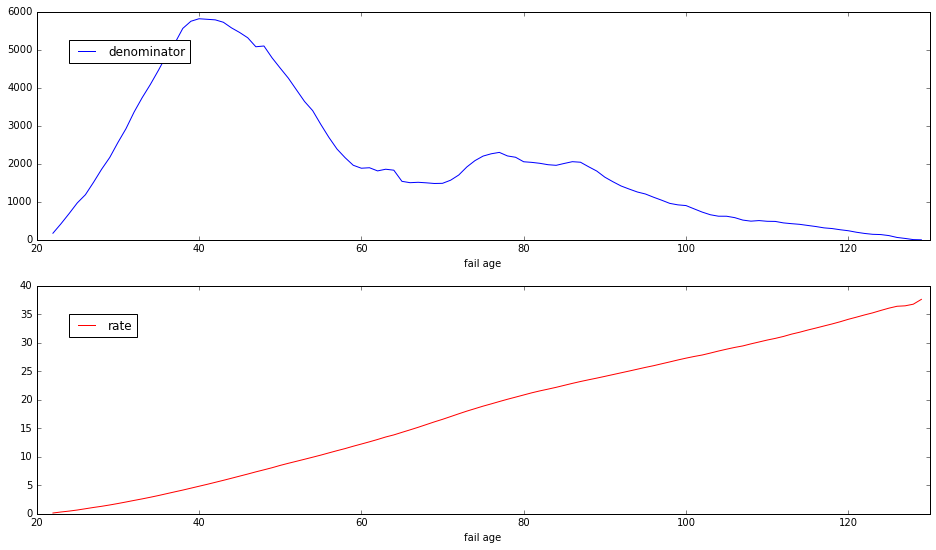

In [58]:
def fail_rate_fail_age(material_full, material_age):
    fail_rate_res=[]
    denominator=0
    molecule=0
    fail_rate_sum=0
    fail_rate_sum_length=0
    #rng=list(np.unique(material_full['fail_age']))
    rng=list(np.unique(material_full['fail_age'][(material_full['fail_age']<130) & (material_full['fail_age']>20)]))
    for i in rng: #i is fail_age
        material_full_i = material_full[material_full['fail_age']==i]
        material_age_i = material_age[(material_age['observe_age']<=i) & (material_age['age']>=i)]
        
        #denominator=len(material_age_i)
        denominator_length=sum(material_age_i['length'])/1000
        
        molecule=len(material_full_i)
        
        fail_rate_sum_length+=molecule/denominator_length
        #fail_rate_sum+=molecule/denominator
        
        #fail_rate_res.append([i, molecule,  denominator, fail_rate_sum])
        fail_rate_res.append([i, molecule, denominator_length, fail_rate_sum_length])
    fail_rate_res_arr=np.array(fail_rate_res)
    fig=plt.figure(figsize=(16,9))
    ax1=fig.add_subplot(2,1,1)
    ax1.plot(fail_rate_res_arr[:,0],fail_rate_res_arr[:,2],'b-',label='denominator')
    ax1.set_xlabel('fail age')
    ax1.set_xlim(20,130)
    plt.legend(loc='upper left', bbox_to_anchor=(0.03,0.9))
    #plt.xticks(rng)
    plt.tight_layout
    
    ax2=fig.add_subplot(2,1,2)
    ax2.plot(fail_rate_res_arr[:,0],fail_rate_res_arr[:,3],'r-',label='rate')
    ax2.set_xlabel('fail age')
    ax2.set_xlim(20,130)
    plt.legend(loc='upper left', bbox_to_anchor=(0.03,0.9))
    #plt.xticks(rng)
    plt.tight_layout
    
    
    fig.savefig('c:/Users/zhouf/Desktop/sample.png',dpi=600)
    return fail_rate_res

fail_rate_fail_age(AC_full, AC_age)